In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,AveragePooling2D

In [48]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [49]:
X_train=X_train/255
X_test=X_test/255

In [50]:
X_train=np.pad(X_train,((0,0),(2,2),(2,2)))
X_test=np.pad(X_test,((0,0),(2,2),(2,2)))
X_train.shape
# X_test.shape

(60000, 32, 32)

In [51]:
X_train=X_train.reshape(-1,32,32,1)
X_test=X_test.reshape(-1,32,32,1)

In [52]:
model=Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding="valid",activation="tanh",input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(16,kernel_size=(5,5),padding="valid",activation="tanh"))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(120,activation="tanh"))
model.add(Dense(84,activation="tanh"))
model.add(Dense(10,activation="softmax"))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [54]:
history=model.fit(X_train,Y_train,epochs=30,batch_size=64,validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8406 - loss: 0.5605 - val_accuracy: 0.9623 - val_loss: 0.1333
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9609 - loss: 0.1273 - val_accuracy: 0.9710 - val_loss: 0.0976
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9753 - loss: 0.0809 - val_accuracy: 0.9713 - val_loss: 0.0920
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9820 - loss: 0.0587 - val_accuracy: 0.9787 - val_loss: 0.0712
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9858 - loss: 0.0437 - val_accuracy: 0.9812 - val_loss: 0.0653
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0334 - val_accuracy: 0.9804 - val_loss: 0.0653
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9833 - val_loss: 0.0577
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9932 - loss: 0.0228 - val_accuracy: 0.

In [ ]:
model.save("LeNet_MNIST_model.h5")

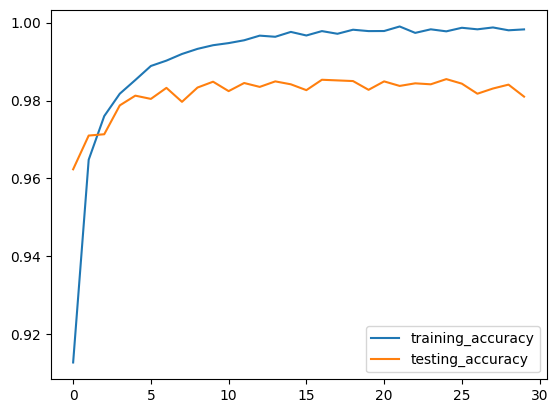

In [56]:
plt.plot(history.history["accuracy"],label="training_accuracy")
plt.plot(history.history["val_accuracy"],label="testing_accuracy")
plt.legend()

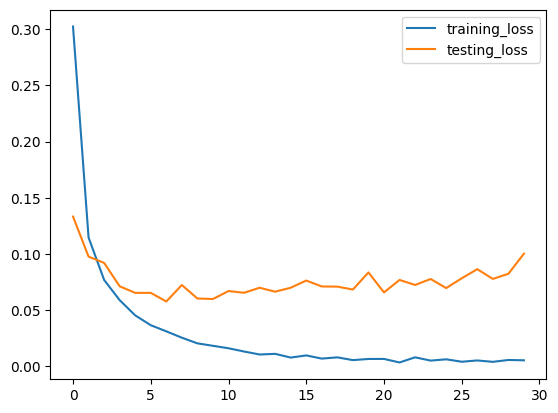

In [57]:
plt.plot(history.history["loss"],label="training_loss")
plt.plot(history.history["val_loss"],label="testing_loss")
plt.legend()

In [58]:
y_predict=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [59]:
test_results=np.argmax(y_predict,axis=1)

In [60]:
print(f"Confusion matrix is: {confusion_matrix(Y_test,test_results)}")
print(f"Accuracy score is: {accuracy_score(Y_test,test_results)}")
print(f"Classification report is: {classification_report(Y_test,test_results)}")

Confusion matrix is: [[ 972    0    0    1    0    0    3    1    3    0]
 [   1 1125    2    0    1    0    2    0    4    0]
 [   1    1 1018    3    0    0    0    4    5    0]
 [   1    0    0  994    0    4    0    1    3    7]
 [   0    0    5    0  931    0    3    2    0   41]
 [   1    0    0    9    0  874    3    0    3    2]
 [   4    2    1    0    1    2  945    0    3    0]
 [   2    2    6    4    1    0    0 1003    1    9]
 [   0    0    1    9    1    1    0    2  956    4]
 [   2    1    0    2    0    2    0    1    0 1001]]
Accuracy score is: 0.9819
Classification report is:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.98      0.98      1010
           4       1.00      0.95      0.97       982
           5       0.99      0.98      0.98       892
           6     

In [1]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

app = Flask(__name__)

# Load the trained MNIST model
model =load_model("LeNet_MNIST_model.h5")

@app.route("/predict", methods=["POST"])
def predict():
    try:
        if 'file' not in request.files:
            return jsonify({"error": "No file provided"}), 400

        file = request.files['file']
        img = Image.open(file).convert("L")  # Convert to grayscale
        img = img.resize((32, 32))           # Resize for LeNet

        # Convert image to numpy array and normalize
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 32, 32, 1)  # Add batch dimension

        # Predict
        prediction = model.predict(img_array)
        digit = int(np.argmax(prediction))
        confidence = float(np.max(prediction))  # Probability of predicted digit

        # Return digit + confidence
        return jsonify({"predicted_digit": digit, "confidence": confidence})

    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Run Flask server
if __name__ == "__main__":
    app.run(port=5000)
